![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
ser_pop = pd.Series([70,8,300,1200],index=["France","Suisse", "USA", "Chine"])

In [3]:
ser_pop

France      70
Suisse       8
USA        300
Chine     1200
dtype: int64

In [4]:
ser_pop[["France","USA"]]

France     70
USA       300
dtype: int64

In [5]:
ser_pop.iloc[0:2]

France    70
Suisse     8
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [6]:
ser_pop.name = "Populations"
ser_pop.index.name = "Pays"
ser_pop

Pays
France      70
Suisse       8
USA        300
Chine     1200
Name: Populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [7]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [8]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

In [9]:
import datetime

In [10]:
pd.datetime.today()

datetime.datetime(2019, 7, 8, 13, 35, 54, 830822)

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

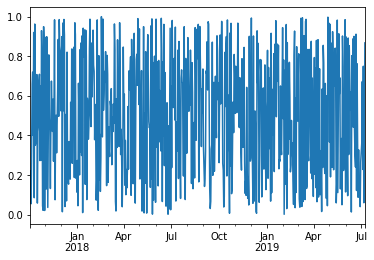

In [11]:
dates = pd.date_range("2017-10-03",pd.datetime.today(),freq="d")
serie_alea = pd.Series(np.random.random(len(dates)),index=dates)
serie_alea.plot()

In [12]:
serie_alea=serie_alea.tz_localize("Europe/Paris")

In [13]:
serie_alea_noumea = serie_alea.tz_convert("Pacific/Noumea")

# Aller plus loin avec les dates

- On peut définir avec pandas des fuseaux horaires
    - On utilise `.tz_localize("Europe/Paris")`
    - On peut changer de fuseau horaire avec `.tz_convert()`

- On peut aussi travailler sur des périodes plutôt que sur des dates
    - On utilise `pd.period_range()`


**Exercice :** 
    
Créez un objet Series avec des résultats par heures à partir d'hier.


In [14]:
pd.period_range("2016-01-01",pd.datetime.today(),freq = "W")

PeriodIndex(['2015-12-28/2016-01-03', '2016-01-04/2016-01-10',
             '2016-01-11/2016-01-17', '2016-01-18/2016-01-24',
             '2016-01-25/2016-01-31', '2016-02-01/2016-02-07',
             '2016-02-08/2016-02-14', '2016-02-15/2016-02-21',
             '2016-02-22/2016-02-28', '2016-02-29/2016-03-06',
             ...
             '2019-05-06/2019-05-12', '2019-05-13/2019-05-19',
             '2019-05-20/2019-05-26', '2019-05-27/2019-06-02',
             '2019-06-03/2019-06-09', '2019-06-10/2019-06-16',
             '2019-06-17/2019-06-23', '2019-06-24/2019-06-30',
             '2019-07-01/2019-07-07', '2019-07-08/2019-07-14'],
            dtype='period[W-SUN]', length=185, freq='W-SUN')

# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [15]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
# on affiche les 5 premieres lignes
airbnb.head() 

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
2,7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47
3,8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.01
4,9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,NaN


In [17]:
airbnb.shape

(59126, 106)

In [18]:
airbnb.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url 

In [19]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [20]:
airbnb["price"]
#airbnb.price
for col in airbnb.select_dtypes(np.number).columns:
    print(col, airbnb[col].mean())

id 17555966.54182593
scrape_id 20190507030941.04
thumbnail_url nan
medium_url nan
xl_picture_url nan
host_id 60109052.292527825
host_acceptance_rate nan
host_listings_count 13.523955337506344
host_total_listings_count 13.523955337506344
neighbourhood_group_cleansed nan
latitude 48.86407962672909
longitude 2.3454179951290737
accommodates 3.0684639583262863
bathrooms 1.12189732823135
bedrooms 1.0992975031739314
beds 1.6725796037652496
square_feet 399.2931180968564
guests_included 1.4787741433548693
minimum_nights 5.643997564523222
maximum_nights 880.9398403409667
minimum_minimum_nights 5.543111321584413
maximum_minimum_nights 5.979670534113588
minimum_maximum_nights 863.0715252173325
maximum_maximum_nights 876.874657511078
minimum_nights_avg_ntm 5.74175320501972
maximum_nights_avg_ntm 868.0784764739702
availability_30 3.272773399181409
availability_60 7.0298007644691
availability_90 14.151033386327503
availability_365 77.80274329398235
number_of_reviews 18.97522240638636
number_of_review

In [21]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,0.082434,0.142762
obs_1,1.028257,0.433340
obs_2,-0.050964,-1.163969
obs_3,1.554042,-1.323964
obs_4,1.444780,-1.099346


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [22]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [23]:
frame1.head(3)

,col_0,col_1
obs_0,0.082434,0.142762
obs_1,1.028257,0.433340
obs_2,-0.050964,-1.163969


Pour afficher un résumé du DF :

In [24]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
col_0    5 non-null float64
col_1    5 non-null float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [25]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")


# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

Si le fichier a un format `json` bien construit on peut utiliser `pd.read_json()`

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [26]:
bank = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [27]:
type(bank)

list

In [28]:
bank[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019","June 18, 2019"
1,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 1, 2019"
2,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
3,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","January 29, 2019"
4,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

In [29]:
credit2 = pd.read_excel("./data/credit2.xlsx")

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [30]:
classeur_ville = pd.ExcelFile("./data/ville.xls")

In [31]:
type(classeur_ville)

pandas.io.excel.ExcelFile

In [32]:
nom_feuille = classeur_ville.sheet_names[0]

In [33]:
ville = classeur_ville.parse(nom_feuille)

In [34]:
ville.to_csv("./data/ville.csv",sep=";")

In [35]:
import matplotlib.pyplot as plt

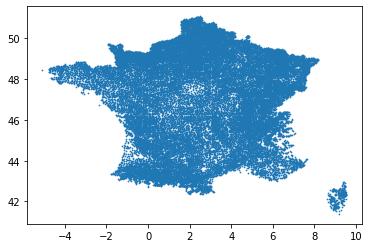

In [36]:
plt.scatter(ville[" Longitude "],ville[" Latitude "],s=0.5)

Ecrire dans un fichier Excel : on peut utiliser ExcelWriter comme classe.

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [37]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [38]:
connexion=create_engine("sqlite:///./data/salaries.sqlite")

In [39]:
connexion.table_names()

['Salaries']

In [40]:
salaries = pd.read_sql_query("select * from salaries",connexion)

In [41]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

In [42]:
salaries = salaries.sort_values(["JobTitle","TotalPay"],ascending=[True,False])

In [43]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 20765 to 18778
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148654 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            148654 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               148654 non-null object
Agency              148654 non-null object
Status              148654 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 15.9+ MB


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.


In [44]:
salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,74768.321972,93692.554811,2012.522643
std,42912.857795,50517.005274,62793.533483,1.117538
min,1.000000,-618.130000,-618.130000,2011.000000
25%,37164.250000,36168.995000,44065.650000,2012.000000
50%,74327.500000,71426.610000,92404.090000,2013.000000
75%,111490.750000,105839.135000,132876.450000,2014.000000
max,148654.000000,567595.430000,567595.430000,2014.000000


In [45]:
salaries.corr()

,Id,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.211478,-0.092190,0.968171
TotalPay,-0.211478,1.000000,0.977313,0.032090
TotalPayBenefits,-0.092190,0.977313,1.000000,0.151947
Year,0.968171,0.032090,0.151947,1.000000


In [46]:
airbnb["price"].dtype

dtype('O')

In [47]:
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str[1:]
                                   .str.replace(",",""))

In [48]:
airbnb["price_num"].dtype

dtype('float64')

In [49]:
airbnb["price_num"].max()

9379.0

In [50]:
airbnb.sort_values("price_num").head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num
33559,19974916,https://www.airbnb.com/rooms/19974916,20190507030954,2019-05-07,Petit nid - village de Montmartre,À deux pas de la Basilique du Sacré Cœur. Dans...,À deux pas du Sacré Cœur dans une charmante ru...,À deux pas de la Basilique du Sacré Cœur. Dans...,none,Montmartre!,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.58,0.0
34341,20291987,https://www.airbnb.com/rooms/20291987,20190507030954,2019-05-08,Romantic Garden view near Champs-Elysées,"Very private, on an inner romantic garden, rem...",The studio offers a well-equipped space and is...,"Very private, on an inner romantic garden, rem...",none,"Quiet neighborhood, small supermarket across t...",...,f,strict_14_with_grace_period,f,f,5,5,0,0,1.42,0.0
46598,27546389,https://www.airbnb.com/rooms/27546389,20190507030954,2019-05-07,Appartement familiale dans le 12ème,NaN,Appartement familiale comprenant trois chambre...,Appartement familiale comprenant trois chambre...,none,NaN,...,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN,0.0
34370,20313940,https://www.airbnb.com/rooms/20313940,20190507030954,2019-05-07,Charming loft in the Upper Marais,Charming artist's loft on the top floor of an ...,The apartment is a single open space with cath...,Charming artist's loft on the top floor of an ...,none,"The Upper Marais, where the apartment is locat...",...,f,moderate,f,f,1,1,0,0,1.29,0.0
34191,20219162,https://www.airbnb.com/rooms/20219162,20190507030954,2019-05-07,Nice & cosy parisian flat,Hello :) Welcome to the best area of Paris ! T...,NaN,Hello :) Welcome to the best area of Paris ! T...,none,NaN,...,f,moderate,f,f,1,1,0,0,0.12,0.0


In [51]:
airbnb["last_review_clean"]=pd.to_datetime(airbnb["last_review"])

In [52]:
# si on veut extraire dans une nouvelle colonne le jour de la semaine
airbnb["last_review_day"]=airbnb["last_review_clean"].dt.day_name()

In [53]:
airbnb["last_review_day"].value_counts(dropna =False)

NaN          12934
Sunday       10589
Monday        8004
Friday        6275
Saturday      5824
Tuesday       5523
Thursday      5030
Wednesday     4947
Name: last_review_day, dtype: int64

In [54]:
airbnb["last_review_day_cat"] = airbnb["last_review_day"].astype('category')

In [55]:
airbnb["last_review_day_cat"].head()

0    Wednesday
1       Friday
2     Saturday
3    Wednesday
4          NaN
Name: last_review_day_cat, dtype: category
Categories (7, object): [Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday]

# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [56]:
credit = pd.read_csv("./data/credit1.txt",sep="\t")

In [57]:
credit_complet = pd.merge(credit2,credit, on= "Customer_ID")

In [58]:
credit_complet.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID,...,Weeks_Since_Last_Offer,Accepted_Personal_Loan,Accepted_Retention,Accepted_Home_Equity_Loan,Accepted_Credit_Card,Annual_value,Interested_in_Personal_Loan,Interested_in_Retention,Interested_in_Home_Equity_Loan,Interested_in_Credit_Card
0,40,F,S,11,6,37,56,37073,F,5409,...,17,F,F,F,F,90,F,F,F,F
1,47,M,M,13,13,30,56,50721,F,5477,...,22,F,F,F,F,260,F,F,F,F
2,35,F,U,1,9,33,57,43578,T,5507,...,27,F,F,T,T,0,F,F,T,F
3,45,M,U,15,7,30,62,69553,F,8,...,51,F,F,F,F,0,F,T,F,F
4,13,F,S,0,7,27,64,37502,T,158,...,8,F,F,F,F,0,F,F,T,F


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [59]:
# on transforme notre colonne textuelle en numérique
airbnb["price_num"]=pd.to_numeric(airbnb["price"].str.replace("$","").str.replace(",",""))

In [60]:
airbnb["price_num"].describe()

count    59126.000000
mean       116.325982
std        167.669754
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price_num, dtype: float64

In [61]:
airbnb[airbnb["price_num"]==7790]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,last_review_clean,last_review_day,last_review_day_cat


In [62]:
pd.cut(airbnb["price_num"],5).value_counts()

(-9.379, 1875.8]    59078
(1875.8, 3751.6]       36
(7503.2, 9379.0]        6
(3751.6, 5627.4]        6
(5627.4, 7503.2]        0
Name: price_num, dtype: int64

In [63]:
airbnb["price_disc"]=pd.qcut(airbnb["price_num"],5)

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [64]:
airbnb.pivot_table(values="price_num",
                   index="bedrooms",
                   aggfunc=["mean","count"],
                   columns=["host_is_superhost"]
                  )

mean                 count        
host_is_superhost            f            t        f       t
bedrooms                                                    
0.0                  72.071250    78.550317  10807.0  1103.0
1.0                  96.946347   101.298266  29989.0  4382.0
2.0                 164.350062   187.021218   8110.0  1084.0
3.0                 273.766132   262.643963   2433.0   323.0
4.0                 395.515625   402.926829    576.0    82.0
5.0                 598.000000   563.875000    102.0    24.0
6.0                 803.470588   507.750000     17.0     4.0
7.0                 961.555556  1030.000000      9.0     3.0
9.0                1250.000000          NaN      1.0     NaN
10.0                300.000000   739.000000      1.0     1.0
38.0                119.000000          NaN      1.0     NaN
50.0                 85.000000          NaN      7.0     NaN

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [65]:
airbnb_group = airbnb.groupby("last_review_day")

In [66]:
airbnb_group["price_num"].mean()

last_review_day
Friday       105.882709
Monday       106.095202
Saturday     110.567995
Sunday       106.120219
Thursday     113.172366
Tuesday      111.266703
Wednesday    110.952294
Name: price_num, dtype: float64

In [67]:
airbnb_group["price_num"].agg(["mean","std","count"]).to_excel("mes_stat_airbnb.xls")

In [68]:
airbnb["price_num"].describe()

count    59126.000000
mean       116.325982
std        167.669754
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price_num, dtype: float64

**Exercice :**

Calculer l'écart entre le salaire min et le salaire max par métier sur les données Salaries

In [69]:
frame_minmax = salaries.groupby("JobTitle")["TotalPay"].agg(["min","max"])

In [70]:
frame_minmax["diff"]=frame_minmax["max"]-frame_minmax["min"]

In [71]:
salaries.groupby("JobTitle")["TotalPay"].apply(lambda x : x.max()-x.min()).sort_values(ascending=False)\
                                         .to_frame(name="diff salaries")

,diff salaries
JobTitle,
CAPTAIN III (POLICE DEPARTMENT),446979.91
Asst Med Examiner,351271.98
"Lieutenant, Fire Suppression",351198.08
EMT/Paramedic/Firefighter,337204.86
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,336768.31
Electronic Maintenance Tech,331779.65
Senior Physician Specialist,322582.27
Deputy Chief 3,322018.53
"Battlion Chief, Fire Suppressi",311433.08


In [72]:
salaries.groupby("JobTitle",as_index=False)["TotalPay"].agg(["min","max",lambda x : x.max()-x.min(),"count"])

,min,max,<lambda>,count
JobTitle,,,,
ACCOUNT CLERK,614.00,60838.20,60224.20,83
ACCOUNTANT,1148.40,65392.01,64243.61,5
ACCOUNTANT INTERN,2981.53,58799.53,55818.00,48
"ACPO,JuvP, Juv Prob (SFERS)",62290.78,62290.78,0.00,1
ACUPUNCTURIST,67594.40,67594.40,0.00,1
ADMINISTRATIVE ANALYST,2388.24,79754.03,77365.79,93
ADMINISTRATIVE ANALYST II,47408.25,75585.82,28177.57,2
ADMINISTRATIVE ANALYST III,92550.03,92847.00,296.97,2
ADMINISTRATIVE ENGINEER,91833.33,149322.23,57488.90,10


In [73]:
salaries.groupby("JobTitle")[["TotalPay",
                            "TotalPayBenefits"]].agg({"TotalPay":"mean",
                                                    "TotalPayBenefits":"var"})

,TotalPay,TotalPayBenefits
JobTitle,,
ACCOUNT CLERK,44035.664337,1.734685e+08
ACCOUNTANT,47429.268000,7.364348e+08
ACCOUNTANT INTERN,29031.742917,4.289589e+08
"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,NaN
ACUPUNCTURIST,67594.400000,NaN
ADMINISTRATIVE ANALYST,63954.867527,3.464697e+08
ADMINISTRATIVE ANALYST II,61497.035000,3.969877e+08
ADMINISTRATIVE ANALYST III,92698.515000,4.409559e+04
ADMINISTRATIVE ENGINEER,127961.430000,2.247923e+08
